# Gaussian Processes

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [12]:
def kernel(x,y,s=1,l=1):
    '''
    Returns GP squared exponential kernel for 
    1D data points
    
    x: 1 x N_x 
    y: 1 x N_y
    '''
    dist = np.subtract.outer(x, y)
    dist2 = np.power(dist,2)
    return np.squeeze(s**2 * np.exp(-0.5 * dist2 / (l**2)))

## GP Prior

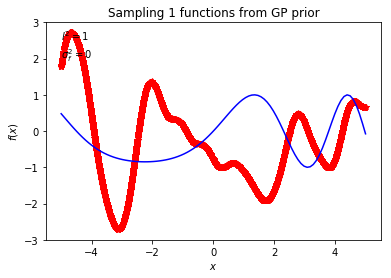

In [18]:
np.random.seed(0)

# True data generating process
#f = lambda x: np.sin(0.34*x**2).flatten()
data_gen_f = lambda x: np.sin(0.9*x+0.2*x**2).flatten()

# At this point GP process has no data to rely upon
n_samples = 1
n_test = 5000 # number of test points
s = 0.00005
Xtest = np.linspace(-5, 5, n_test)

l, sf = 1, 0.2
K_ss = kernel(Xtest,Xtest,l**0.5,sf**0.5)
L_ss = np.linalg.cholesky(K_ss + s*np.eye(n_test))
f_prior = np.dot(L_ss, np.random.normal(size=(n_test,n_samples)))

plt.figure()
plt.plot(Xtest, f_prior, '*r')
plt.plot(np.linspace(-5,5,100), data_gen_f(np.linspace(-5,5,100)), 'b')
plt.title('Sampling %d functions from GP prior' % n_samples)
plt.text(-5,2.5,'$l^2=%d$' % l)
plt.text(-5,2,'$\sigma_f^2=%d$' % sf)
plt.ylim(-3,3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()


## Training data (Regression)

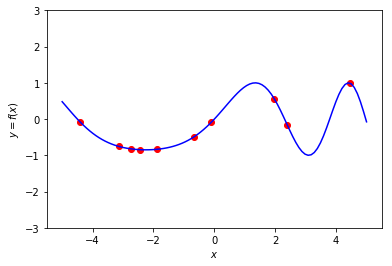

In [5]:
n_train = 10 # number of training points

Xtrain = np.random.uniform(-5, 5, size=(n_train))
ytrain = data_gen_f(Xtrain)

plt.figure()
plt.plot(Xtrain,ytrain,'ro')
plt.plot(np.linspace(-5,5,100), data_gen_f(np.linspace(-5,5,100)), 'b')
plt.ylim(-3,3)
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.show()

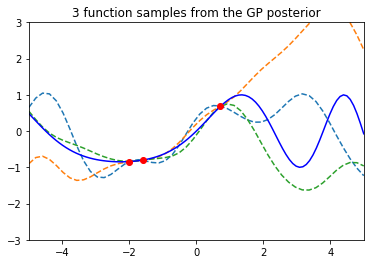

In [20]:
s = 0.00005 # for cholesky decomposition

n_samples = 3

# Training data
n_train = 3 # number of training points
Xtrain = np.random.uniform(-5, 5, size=(n_train))
ytrain = data_gen_f(Xtrain)

# Testing data
n_test = 50 # number of test points
Xtest = np.linspace(-5, 5, n_test)

# GP
K = kernel(Xtrain, Xtrain)
L = np.linalg.cholesky(K + s*np.eye(n_train))
Lk = np.linalg.solve(L, kernel(Xtrain, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain))

K_ss = kernel(Xtest, Xtest)
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

L_ss = np.linalg.cholesky(K_ss + 1e-6*np.eye(n_test) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L_ss, np.random.normal(size=(n_test,n_samples)))
plt.figure()
plt.plot(Xtest, f_post, '--')
plt.title('%d function samples from the GP posterior' % n_samples)
plt.plot(np.linspace(-5,5,100), data_gen_f(np.linspace(-5,5,100)), 'b')
plt.plot(Xtrain,ytrain,'ro')
plt.axis([-5, 5, -3, 3])
plt.show()

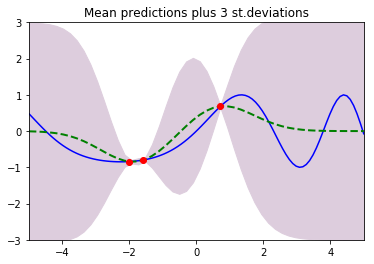

In [21]:
plt.figure()
plt.plot(np.linspace(-5,5,100), data_gen_f(np.linspace(-5,5,100)), 'b')
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#ddcddd")
plt.plot(Xtest, mu, 'g--', lw=2)
plt.plot(Xtrain,ytrain,'ro')
plt.savefig('predictive.png', bbox_inches='tight')
plt.title('Mean predictions plus 3 st.deviations')
plt.axis([-5, 5, -3, 3])
plt.show()

## Regression with noisy data

Xtrain [-3.16103103  3.38253723 -2.33482323 -4.42517442  4.83431821]
ytrain [-0.74896884 -0.81375866 -0.84739567 -0.06617485  0.38920193]
Xtrain [-3.16103103  3.38253723 -2.33482323 -4.42517442  4.83431821 -4.        ]
ytrain [-0.74896884 -0.81375866 -0.84739567 -0.06617485  0.38920193 -0.38941834]


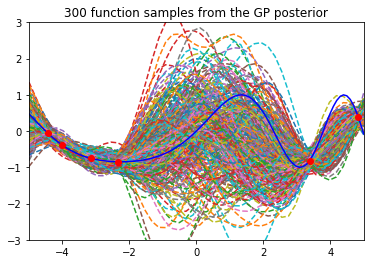

In [32]:
s = 0.00005 # for cholesky decomposition

n_samples = 300

# Training data
n_train = 6 # number of training points
Xtrain = np.random.uniform(-5, 5, size=(n_train-1))
ytrain = data_gen_f(Xtrain)
print 'Xtrain', Xtrain
print 'ytrain', ytrain

Xtrain = np.append(Xtrain,np.array([-4.]))
ytrain = np.append(ytrain,data_gen_f(np.array([-4.])))

print 'Xtrain', Xtrain
print 'ytrain', ytrain

# Testing data
n_test = 50 # number of test points
Xtest = np.linspace(-5, 5, n_test)

# GP
K = kernel(Xtrain, Xtrain) + 0.02*np.identity(6)
L = np.linalg.cholesky(K + s*np.eye(n_train))
Lk = np.linalg.solve(L, kernel(Xtrain, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain))

K_ss = kernel(Xtest, Xtest)
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

L_ss = np.linalg.cholesky(K_ss + 1e-6*np.eye(n_test) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L_ss, np.random.normal(size=(n_test,n_samples)))
plt.figure()
plt.plot(Xtest, f_post, '--')
plt.title('%d function samples from the GP posterior' % n_samples)
plt.plot(np.linspace(-5,5,100), data_gen_f(np.linspace(-5,5,100)), 'b')
plt.plot(Xtrain,ytrain,'ro')
plt.axis([-5, 5, -3, 3])
plt.show()

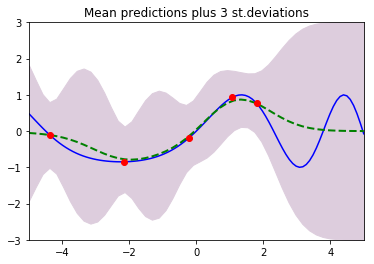

In [10]:
plt.figure()
plt.plot(np.linspace(-5,5,100), data_gen_f(np.linspace(-5,5,100)), 'b')
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#ddcddd")
plt.plot(Xtest, mu, 'g--', lw=2)
plt.plot(Xtrain,ytrain,'ro')
plt.savefig('predictive.png', bbox_inches='tight')
plt.title('Mean predictions plus 3 st.deviations')
plt.axis([-5, 5, -3, 3])
plt.show()